## Import the nessisary packages

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


Holehouse Lab specific imports
Note: You will need to pip install sparrow in order for this code to work.
The last two imports are needed to use the front end.

In [2]:
import metapredict as meta
from sparrow import Protein
from finches.frontend.mpipi_frontend import Mpipi_frontend
from finches.frontend.calvados_frontend import CALVADOS_frontend

## Overview of How Finches Works
Under the hood, finches is built on a forcefield object (custom_model, Mpipi_model, calvados_model) which has its interaction properties called on by an object that handles the calculations (InteractionMatrixConstructor). The force field and calculation object get combined into a frontend object (FinchesFrontend, Mpipi_frontend, CALVADOS_frontend). This allows the user to think of the calculations they can do with this package as one object. Various functions can be called from this object (without the need to specify all the properties of the predefined forcefield) for fast calculation and visualization of results. In order to use these you need to import them from the finches front end and then initialize them with the parameters you want to use. 

Note: The parameters are only as accurate as the forcefields themselves. For example, the salt you concentrations are "bulk" salt and look to get the interactions on average correct.

In [7]:
#Both of the following are initialized with their default values.
#These could be initialized with nothing in the parenthesis

#initialize a version of the calculations that are based on the Mpipi forcefield
#mf = Mpipi_frontend() #this is an equivilent way to do this
#Roughly physiologic salt, roughly waters dielectric
mf = Mpipi_frontend(salt=0.150, dielectric=80.0) #Salt in M; dielectric is arbitrary units

#initialize a version of the calculations that are based on the Calvados forcfield
#cf = CALVADOS_frontend() #this is an equivilent way to do this
#Roughly physiologic salt, roughly physiologic pH, around room temperature
cf = CALVADOS_frontend(salt=0.150, pH=7.4, temp=288) #Salt in "M"; pH is "logarithmic units"; temperature in K

/Users/nrazo/Packages/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


## Loading Sequences to Display Examples

In [13]:
#GS linker
GS_LINKER = 20*'GS'


# med sequence (not a TF so not in the dataset...)
med1 = 'MKAQGETEESEKLSKMSSLLERLHAKFNQNRPWSETIKLVRQVMEKRVVMSSGGHQHLVSCLETLQKALKVTSLPAMTDRLESIARQNGLGSHLSASGTECYITSDMFYVEVQLDPAGQLCDVKVAHHGENPVSCPELVQQLREKNFDEFSKHLKGLVNLYNLPGDNKLKTKMYLALQSLEQDLSKMAIMYWKATNAGPLDKILHGSVGYLTPRSGGHLMNLKYYVSPSDLLDDKTASPIILHENNVSRSLGMNASVTIEGTSAVYKLPIAPLIMGSHPVDNKWTPSFSSITSANSVDLPACFFLKFPQPIPVSRAFVQKLQNCTGIPLFETQPTYAPLYELITQFELSKDPDPIPLNHNMRFYAALPGQQHCYFLNKDAPLPDGRSLQGTLVSKITFQHPGRVPLILNLIRHQVAYNTLIGSCVKRTILKEDSPGLLQFEVCPLSESRFSVSFQHPVNDSLVCVVMDVQDSTHVSCKLYKGLSDALICTDDFIAKVVQRCMSIPVTMRAIRRKAETIQADTPALSLIAETVEDMVKKNLPPASSPGYGMTTGNNPMSGTTTPTNTFPGGPITTLFNMSMSIKDRHESVGHGEDFSKVSQNPILTSLLQITGNGGSTIGSSPTPPHHTPPPVSSMAGNTKNHPMLMNLLKDNPAQDFSTLYGSSPLERQNSSSGSPRMEICSGSNKTKKKKSSRLPPEKPKHQTEDDFQRELFSMDVDSQNPIFDVNMTADTLDTPHITPAPSQCSTPPTTYPQPVPHPQPSIQRMVRLSSSDSIGPDVTDILSDIAEEASKLPSTSDDCPAIGTPLRDSSSSGHSQSTLFDSDVFQTNNNENPYTDPADLIADAAGSPSSDSPTNHFFHDGVDFNPDLLNSQSQSGFGEEYFDESSQSGDNDDFKGFASQALNTLGVPMLGGDNGETKFKGNNQADTVDFSIISVAGKALAPADLMEHHSGSQGPLLTTGDLGKEKTQKRVKEGNGTSNSTLSGPGLDSKPGKRSRTPSNDGKSKDKPPKRKKADTEGKSPSHSSSNRPFTPPTSTGGSKSPGSAGRSQTPPGVATPPIPKITIQIPKGTVMVGKPSSHSQYTSSGSVSSSGSKSHHSHSSSSSSSASTSGKMKSSKSEGSSSSKLSSSMYSSQGSSGSSQSKNSSQSGGKPGSSPITKHGLSSGSSSTKMKPQGKPSSLMNPSLSKPNISPSHSRPPGGSDKLASPMKPVPGTPPSSKAKSPISSGSGGSHMSGTSSSSGMKSSSGLGSSGSLSQKTPPSSNSCTASSSSFSSSGSSMSSSQNQHGSSKGKSPSRNKKPSLTAVIDKLKHGVVTSGPGGEDPLDGQMGVSTNSSSHPMSSKHNMSGGEFQGKREKSDKDKSKVSTSGSSVDSSKKTSESKNVGSTGVAKIIISKHDGGSPSIKAKVTLQKPGESSGEGLRPQMASSKNYGSPLISGSTPKHERGSPSHSKSPAYTPQNLDSESESGSSIAEKSYQNSPSSDDGIRPLPEYSTEKHKKHKKEKKKVKDKDRDRDRDKDRDKKKSHSIKPESWSKSPISSDQSLSMTSNTILSADRPSRLSPDFMIGEEDDDLMDVALIGN'

# IDR 
med1_idr = med1[537:]

# IDRs from med14 and med15; nb med15 seems to generally be the most attractive
med14_idr = 'QDARRRSVNEDDNPPSPIGGDMMDSLISQLQPPPQQQPFPKQPGTSGAYPLTSPPTSYHSTVNQSPSMMHTQSPGNLHAASSPSGALRAPSPASFVPTPPPSSHGISIGPGASFASPHGTLDPSSPYTMVSPSGRAGNWPGSPQVSGPSPAARMPGMSPANPSLHSPVPDASHSPRAGTSSQTMPTNMPPPRKLPQRSWAAS'
med15_idr = 'KSQASVSDPMNALQSLTGGPAAGAAGIGMPPRGPGQSLGGMGSLGAMGQPMSLSGQPPPGTSGMAPHSMAVVSTATPQTQLQLQQVALQQQQQQQQFQQQQQAALQQQQQQQQQQQFQAQQSAMQQQFQAVVQQQQQLQQQQQQQQHLIKLHHQNQQQIQQQQQQLQRIAQLQLQQQQQQQQQQQQQQQQALQAQPPIQQPPMQQPQPPPSQALPQQLQQMHHTQHHQPPPQPQQPPVAQNQPSQLPPQSQTQPLVSQAQALPGQMLYTQPPLKFVRAPMVVQQPPVQPQVQQQQTAVQTAQAAQMVAPGVQMITEALAQGGMHIRARFPPTTAVSAIPSSSIPLGRQPMAQVSQSSLPMLSSPSPGQQVQTPQSMPPPPQPSPQPGQPSSQPNSNVSSGPAPSPSSFLPSPSPQPSQSPVTARTPQNFSVPSPGPLNTPVNPSSVMSPAGSSQA'


## Calculating an epsilon value
An epsilon value is aimed at getting at overall attractive or repulsiveness between two interacting IDR sequences. Since it is designed to get at interaction it is convienent to think of this value as a proxy for energy difference to have these two IDRs go from unbound to bound (at equilibrium and in the context of the solvent). This can help in understanding what the realative magnitudes of the these values mean.

Note: these calculation could be performed with calvados forcefiled by simply switching "mf" for "cf".

In [12]:
#calculate the interaction for med1_idr with med14_idr and then med15_idr

#med1_idr interacts with med14_idr
interact1 = mf.epsilon(med1_idr,med14_idr)

#med1_idr interacts with med15_idr
interact2 = mf.epsilon(med1_idr,med15_idr)

#print the resulting values
print(f"med1's IDR interacting with | Interaction Value")
print(f"med14's IDR                   {interact1}")
print(f"med15's IDR                   {interact2}")

med1's IDR interacting with | Interaction Value
med14's IDR                   37.880632775321345
med15's IDR                   26.39345666695965


Based on the above results med1's IDR is predicted to interact stronger with med15's. This is because like free energies, epsilon values indicate smaller values as being more attractive. The 0 value is tuned with GS linkers self interactions. This means that GS linkers interacting with themselves will give a 0 value back for the epsilon value.

In [15]:
#calculate the epsilon value for a GS linker
gs_interaction = mf.epsilon(GS_LINKER, GS_LINKER)
print(f"The GS linker epsilon interaction value is {gs_interaction}.\nThis is close to 0")

The GS linker epsilon interaction value is 1.451761984938571e-05.
This is close to 0


The epsilon value is dependant on order. This is because it is an "extrinsic" calculation. Flipping the order will yeild different values. The way to think about this is that you are taking the first sequence and "bathing" it in the second sequence.

In [17]:
#med1_idr interacts with med14_idr
interact1 = mf.epsilon(med1_idr,med14_idr)

#flip the order of the interaction
interact1_flipped = mf.epsilon(med14_idr,med1_idr)

#print the result of flipping the order
print(f"This is the interaction value of med1 bathed in med14: {interact1}")
print(f"This is the interaction value of med14 bathed in med1: {interact1_flipped}")
print(f"Note that these are different values.")

This is the interaction value of med1 bathed in med14: 37.880632775321345
This is the interaction value of med14 bathed in med1: 7.3293944641905355
Note that these are different values.


You can recover an "intrinsic" interaction value by dividing by the sequence length of the first IDR entered. This shows in what way the calculation is "extrinsic". It is so in a sequence length sense.

In [24]:
intrinsic_interact1 = interact1/len(med1_idr)
intrinsic_interact1_flipped = interact1_flipped/len(med14_idr)
print(f"This is the interaction value of med1 bathed in med14 divided by the length of med1's sequence: {intrinsic_interact1}")
print(f"This is the interaction value of med14 bathed in med1 divided by the length of med14's sequence: {intrinsic_interact1_flipped}")
print(f"Notice how the flipped interaction calculation are the same once they are divided by the first sequences length.")

This is the interaction value of med1 bathed in med14 divided by the length of med1's sequence: 0.0362841310108442
This is the interaction value of med14 bathed in med1 divided by the length of med14's sequence: 0.03628413101084423
Notice how the flipped interaction calculation are the same once they are divided by the first sequences length.


The epsilon function assumes all the portions of the sequences are IDRs. If your sequence is not fully an IDR then you will need to truncate it to the portion that is an IDR.

There are correction terms built into the calculation. These are meant to correct for 2 phenomina the baseline forcefield integration does not capture well. The first is an aliphatic correction. Aliphatic residues are more "sticky" that one would expect. This is due to the hydrophobic effect. Clusters of aliphatics are not respresented well by simple two body integration schemes. This gets corrected for under the hood. Another effect that gets corrected for is that charge clusters are less repulsive than they would seem to be from simple two body integration. This is because average radial fields neglect things like the side chain orientation (the ability to spin the charge out of the presense of another charge slightly). You can turn either of these corrections off if you have a need to do that. It is NOT recommended to turn these off unless there is a good reason.

In [25]:
#med1_idr interacts with med14_idr
interact1 = mf.epsilon(med1_idr,med14_idr)

#compute the interaction without the aliphatic correction
interact1_wo_ali = mf.epsilon(med1_idr,med14_idr, use_aliphatic_weighting=False)
#compute the interaction without the charge correction
interact1_wo_charge = mf.epsilon(med1_idr,med14_idr, use_charge_weighting=False)
#compute the interaction without the charge correction
interact1_wo_both = mf.epsilon(med1_idr,med14_idr, use_aliphatic_weighting=False, use_charge_weighting=False)

#print out the results
print(f"Calculation defaults: {interact1}")
print(f"Calculation without aliphatic correction: {interact1_wo_ali}")
print(f"Calculation without charge correction: {interact1_wo_charge}")
print(f"Calculation without both corrections: {interact1_wo_both}")

Calculation defaults: 37.880632775321345
Calculation without aliphatic correction: 39.08934821434127
Calculation without charge correction: 40.73848360634382
Calculation without both corrections: 41.94719904536376


## Epsilon "vector" calculations

The epsilon value is quite useful as it provides gross information about the interaction. However, this does not provide any information about the residue level interaction strength. This is where the epsilon vector calculation comes in handy. Similar to the epsilon value it does not auto parse out non-IDR regions of your sequence so you will need to do that before you can proceed.

In [33]:
#quick example of the epsilon vector calculation
interact1_vec = mf.epsilon_vectors(med1_idr,med14_idr) #[0] = attractive numpy array; [1] = repulsive numpy array
print(interact1_vec[0])

[-4.02623140e-02 -1.90287394e-01  3.51559278e-02 -1.08475226e-01
 -1.08475226e-01  1.23556465e-02 -1.16691108e-02 -1.16691108e-02
 -1.08475226e-01 -7.75828388e-02 -4.36595613e-01 -7.75828388e-02
  5.56938242e-05  2.29421054e-02  2.29421054e-02 -7.75828388e-02
 -1.90287394e-01 -1.90287394e-01 -1.08475226e-01  5.56938242e-05
 -1.16691108e-02 -7.75828388e-02  2.29421054e-02  2.29421054e-02
  2.29421054e-02 -1.08475226e-01  2.29421054e-02 -1.90287394e-01
  2.29421054e-02 -4.01460637e-01 -1.08475226e-01 -7.75828388e-02
 -7.75828388e-02 -1.08475226e-01  2.42881670e-02  2.29421054e-02
  2.29421054e-02  3.51559278e-02 -4.01460637e-01 -1.90287394e-01
 -2.00895087e-02 -1.16691108e-02  5.56938242e-05 -1.16691108e-02
  5.52085156e-03 -3.44518528e-02 -2.11481980e-01 -3.49155322e-01
 -3.63471360e-01 -2.33443708e-01 -1.16691108e-02  2.73098290e-02
 -7.75828388e-02 -3.63471360e-01 -7.75828388e-02 -2.32479296e-01
 -2.22062853e-01 -4.01460637e-01 -1.16691108e-02 -4.02623140e-02
  2.73098290e-02 -1.16691

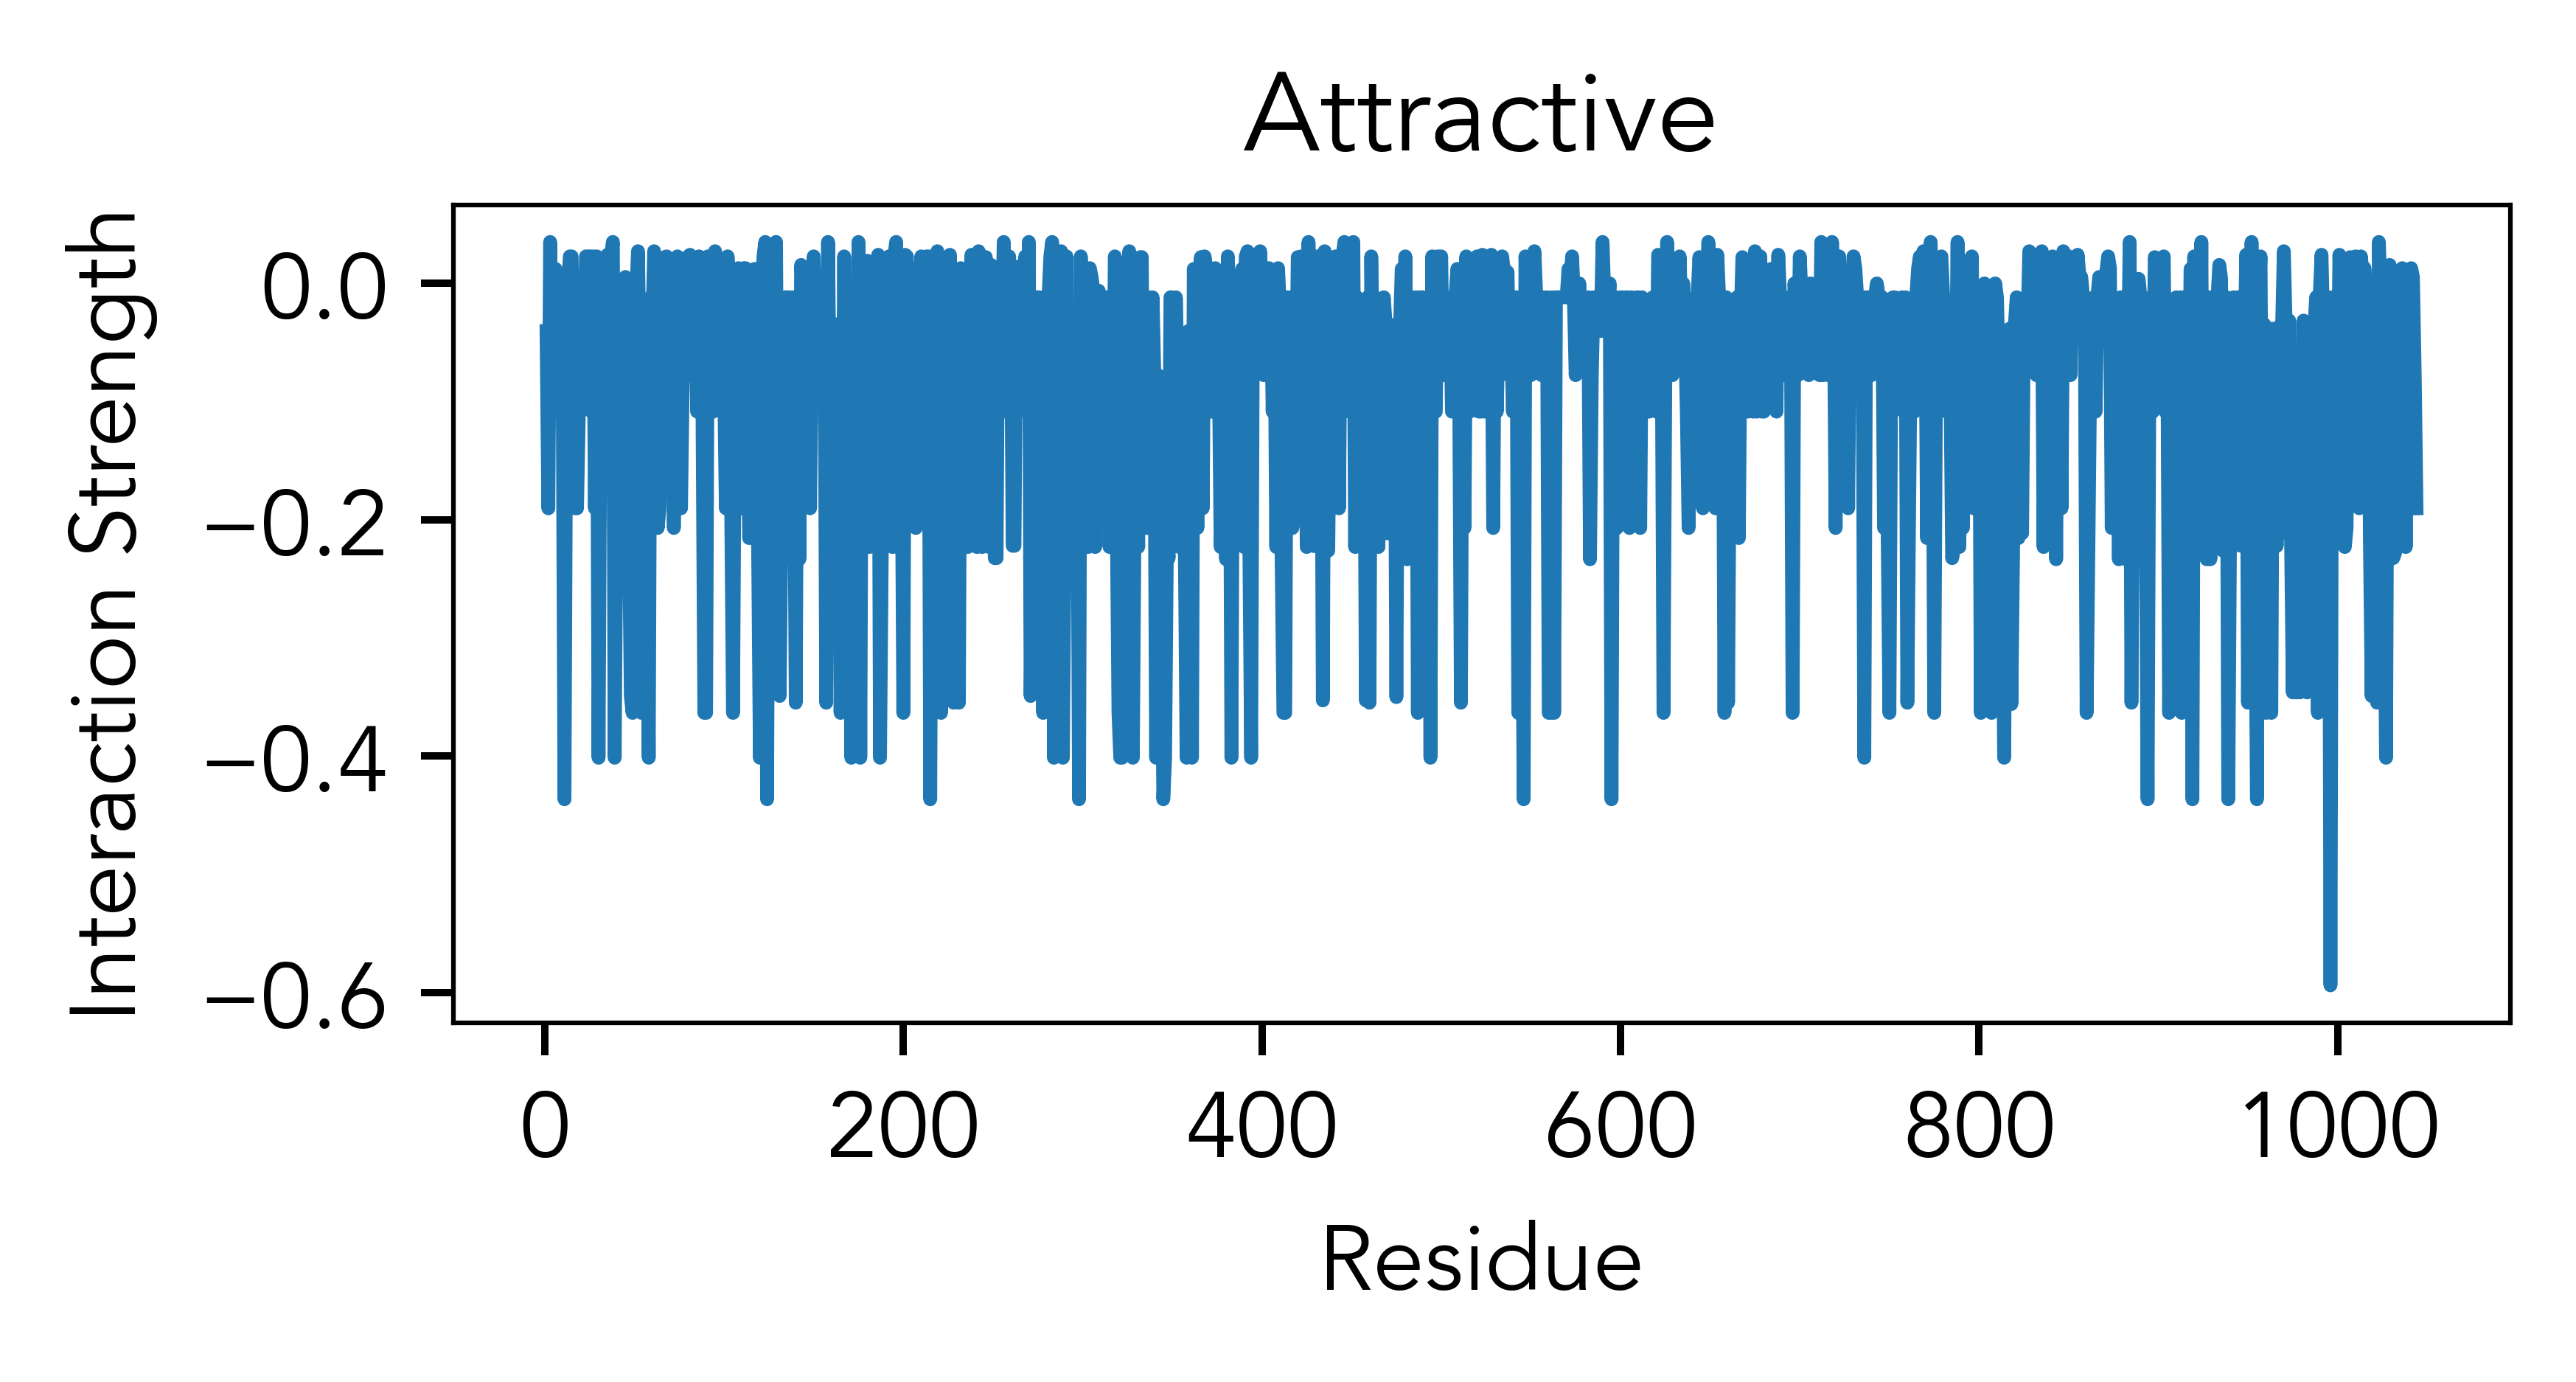

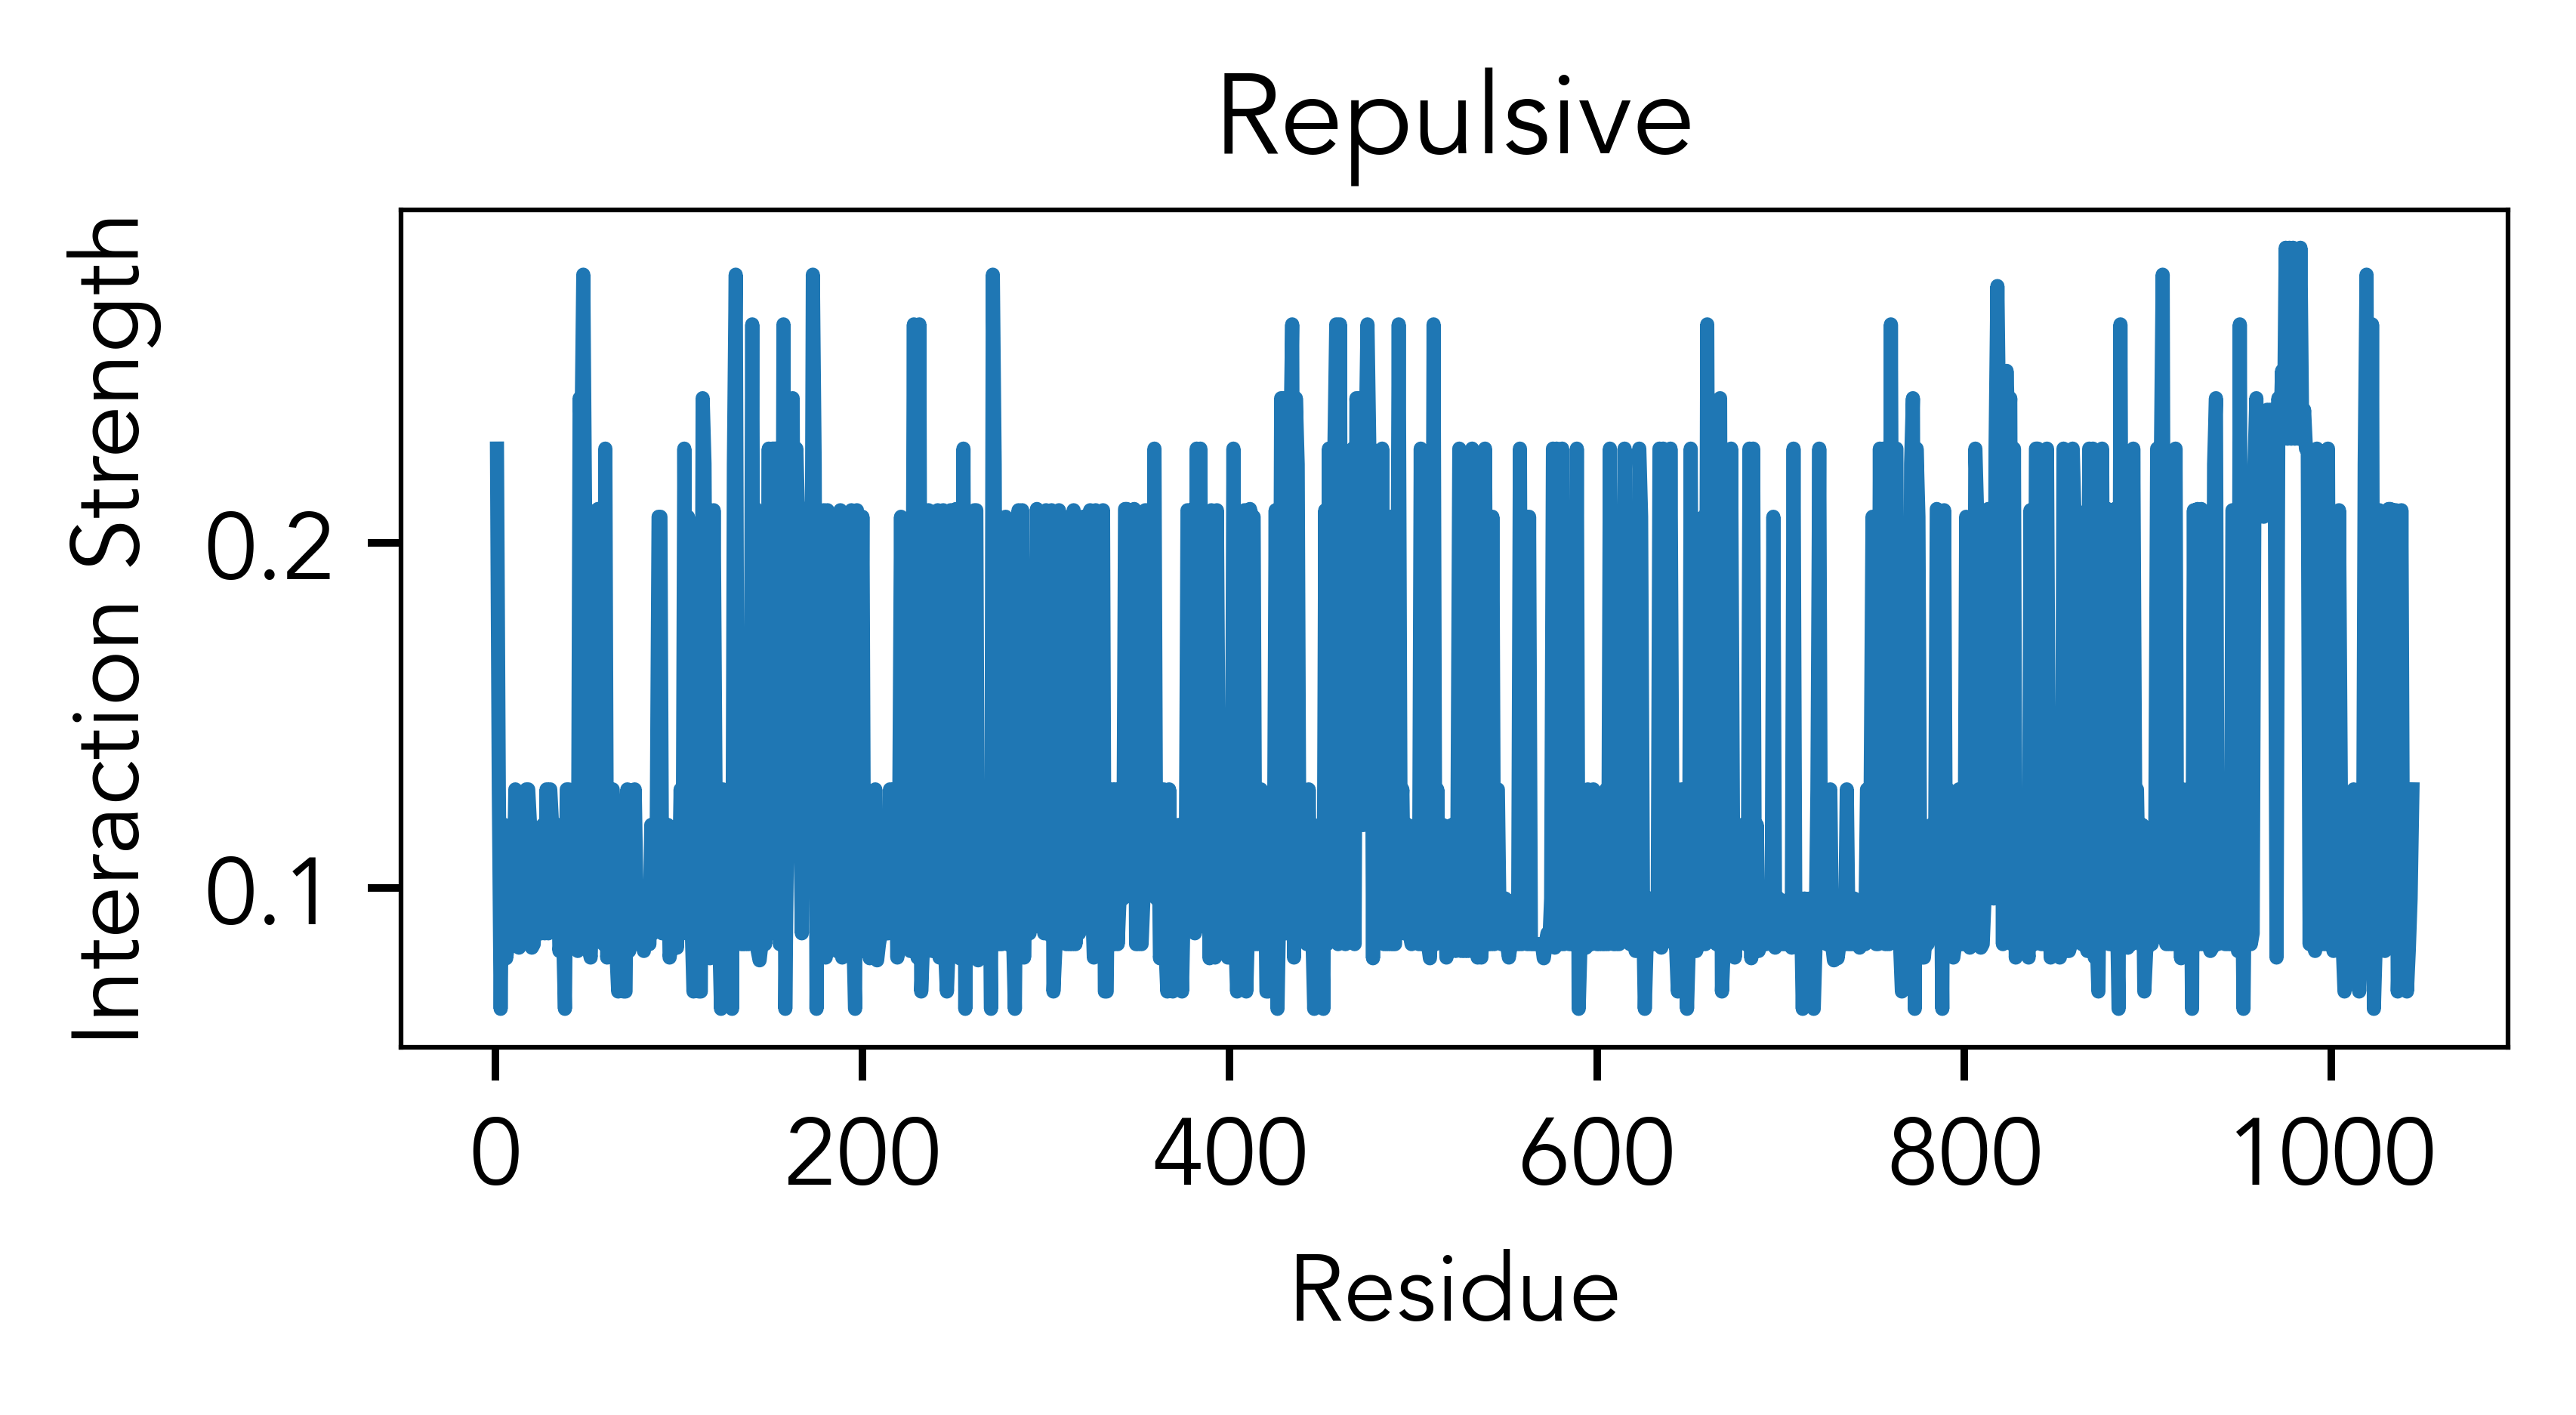

In [42]:
#lets plot the attractive and repulsive portions of the interactions
attractive_vec = interact1_vec[0]
repulsive_vec = interact1_vec[1]
residue_number = np.arange(1,len(attractive_vec)+1)

#Attractive vector plot
fig = plt.figure(figsize=(4, 1.6), dpi=450)
plt.plot(residue_number, attractive_vec)
plt.xlabel(f"Residue")
plt.ylabel(f"Interaction Strength")
plt.title(f"Attractive")
plt.show()
#repulsive vector plot
fig = plt.figure(figsize=(4, 1.6), dpi=450)
plt.plot(residue_number, repulsive_vec)
plt.xlabel(f"Residue")
plt.ylabel(f"Interaction Strength")
plt.title(f"Repulsive")
plt.show()

You can see how the attractive and repuslive values are defined as being below and above 0 respectively. The raw vectors is often not what you will want to plot though. There is a need to smooth the values and combine the attractive and repulsive vectors. 